In [1]:
# ISYS 812 - Fall 2022 - SFSU
# Project : Analysing Predictors of Heart Disease
# Name: Saksham Motwani

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

**I. Importing the Data sourced from Kaggle**


In [3]:
master_data = pd.read_csv("heart_2020_cleaned.csv")

In [4]:
master_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


**II. Exploring the Data**

In [5]:
master_data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
# Check if columns have any missing values
print(master_data.isnull().any())

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool


In [8]:
# There are no missing values, checking for unusual values in the categorical columns (any misspelled) values
print ('Unique Values of all categorical columns:')
for col in master_data.select_dtypes(include = 'object'):
    print(col,':', master_data[col].unique())

Unique Values of all categorical columns:
HeartDisease : ['No' 'Yes']
Smoking : ['Yes' 'No']
AlcoholDrinking : ['No' 'Yes']
Stroke : ['No' 'Yes']
DiffWalking : ['No' 'Yes']
Sex : ['Female' 'Male']
AgeCategory : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity : ['Yes' 'No']
GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma : ['Yes' 'No']
KidneyDisease : ['No' 'Yes']
SkinCancer : ['Yes' 'No']


In [9]:
# Summarize numerical data, checking for unusual values
master_data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [10]:
# Percentage of people in our dataset who suffer from heart disease
master_data['HeartDisease'].value_counts(normalize = True)*100

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64

**III. Cleaning the Data**

Performing One Hot encoding after we did not find any missing or unusual values

In [11]:
# Since the data is already clean, meaning no missing or unusual values, our data cleansing process consisted
# of encoding the categorical values i.e. transforming non-numeric features into numeric ones. 

# Create a copy of the dataframe
data = master_data.copy()


# For features with Yes/No binary values, Sex - Male/Female values, and General Health - having 5 values
# create a mapping dictionary that contains each column to process as well as a dictionary of the values to transform 
encoding_dict = {"HeartDisease":     {"No": 0, "Yes": 1},
                 "Smoking":          {"No": 0, "Yes": 1},
                 "AlcoholDrinking":  {"No": 0, "Yes": 1},
                 "Stroke":           {"No": 0, "Yes": 1},
                 "DiffWalking":      {"No": 0, "Yes": 1},
                 "Sex":              {"Female": 0, "Male": 1},
                 "PhysicalActivity": {"No": 0, "Yes": 1},
                 "Asthma":           {"No": 0, "Yes": 1},
                 "KidneyDisease":    {"No": 0, "Yes": 1},
                 "SkinCancer":       {"No": 0, "Yes": 1},
                 "GenHealth":        {"Poor": 5, "Fair": 4, "Good": 3, "Very good": 2, "Excellent": 1},
}
data = data.replace(encoding_dict)

In [12]:
# Using Pandas getdummies function to convert the categorical variables 'AgeCategory' , 'Race', 'Diabetic' into indicator variables
# After that just dropping the original columns, renaming columns for better understanding
data = pd.concat([data, pd.get_dummies(data['AgeCategory'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Race'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Diabetic'])], axis=1)

In [13]:
data.drop(['AgeCategory', 'Race', 'Diabetic', 'No'], axis = 1, inplace = True)
data.rename (columns= {            '18-24': 'Age: 18-24',
                                   '25-29': 'Age: 25-29',
                                   '30-34': 'Age: 30-34',
                                   '35-39': 'Age: 35-39',
                                   '40-44': 'Age: 40-44',
                                   '45-49': 'Age: 45-49',
                                   '50-54': 'Age: 50-54',
                                   '55-59': 'Age: 55-59',
                                   '60-64': 'Age: 60-64',
                                   '65-69': 'Age: 65-69',
                                   '70-74': 'Age: 70-74',
                                   '75-79': 'Age: 75-79',
                                  '80 or older': 'Age: 80+',
                                  'White': 'Race: White',
                                  'Black': 'Race: Black',
                                  'Asian': 'Race: Asian',
                                  'American Indian/Alaskan Native': 'Race: Am. Indian/Alaskan Native',
                                  'Hispanic': 'Race: Hispanic',
                                  'Other': 'Race: Other',
                                  "AlcoholDrinking": 'HeavyAlcohol',
                                  'No, borderline diabetes': 'Borderline Diabetic',
                                  'Yes': 'GenDiabetic',
                                  'Yes (during pregnancy)': 'Pregnancy Diabetic',
}, inplace = True)

In [14]:
# Putting the column 'GenDiabetic' 1 position ahead
a = data['GenDiabetic']
data.drop(['GenDiabetic'], axis = 1, inplace = True)
data.insert(34, 'GenDiabetic', a)

# First 10 rows after cleaning dataset
data.head(10)

,HeartDisease,BMI,Smoking,HeavyAlcohol,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Age: 80+,Race: Am. Indian/Alaskan Native,Race: Asian,Race: Black,Race: Hispanic,Race: Other,Race: White,GenDiabetic,Borderline Diabetic,Pregnancy Diabetic
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,31.64,1,0,0,5.0,0.0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,1,...,0,0,0,0,0,0,1,0,0,0


**IV. Data Analysis**

**Question 1: What is the overall correlation across all factors?**

In [15]:
# Apply the corr function to get the correlation matrix
corr_mat = data.corr()
round (corr_mat, 2)

,HeartDisease,BMI,Smoking,HeavyAlcohol,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Age: 80+,Race: Am. Indian/Alaskan Native,Race: Asian,Race: Black,Race: Hispanic,Race: Other,Race: White,GenDiabetic,Borderline Diabetic,Pregnancy Diabetic
HeartDisease,1.00,0.05,0.11,-0.03,0.20,0.17,0.03,0.20,0.07,-0.10,...,0.14,0.01,-0.03,-0.01,-0.04,-0.00,0.04,0.18,0.02,-0.01
BMI,0.05,1.00,0.02,-0.04,0.02,0.11,0.06,0.18,0.03,-0.15,...,-0.09,0.03,-0.08,0.08,0.02,0.01,-0.05,0.20,0.05,0.01
Smoking,0.11,0.02,1.00,0.11,0.06,0.12,0.09,0.12,0.09,-0.10,...,0.01,0.04,-0.06,-0.04,-0.07,0.02,0.07,0.06,0.01,-0.01
HeavyAlcohol,-0.03,-0.04,0.11,1.00,-0.02,-0.02,0.05,-0.04,0.00,0.02,...,-0.05,-0.00,-0.02,-0.03,-0.02,0.01,0.03,-0.06,-0.01,-0.00
Stroke,0.20,0.02,0.06,-0.02,1.00,0.14,0.05,0.17,-0.00,-0.08,...,0.09,0.01,-0.02,0.02,-0.03,0.01,0.00,0.11,0.01,-0.00
PhysicalHealth,0.17,0.11,0.12,-0.02,0.14,1.00,0.29,0.43,-0.04,-0.23,...,0.04,0.02,-0.04,0.01,-0.01,0.02,-0.00,0.16,0.02,-0.00
MentalHealth,0.03,0.06,0.09,0.05,0.05,0.29,1.00,0.15,-0.10,-0.10,...,-0.07,0.02,-0.02,0.01,0.01,0.03,-0.02,0.03,0.01,0.02
DiffWalking,0.20,0.18,0.12,-0.04,0.17,0.43,0.15,1.00,-0.07,-0.28,...,0.16,0.03,-0.04,0.04,-0.01,0.01,-0.02,0.22,0.03,-0.01
Sex,0.07,0.03,0.09,0.00,-0.00,-0.04,-0.10,-0.07,1.00,0.05,...,-0.05,-0.00,0.01,-0.04,-0.00,0.01,0.02,0.02,-0.00,-0.09
PhysicalActivity,-0.10,-0.15,-0.10,0.02,-0.08,-0.23,-0.10,-0.28,0.05,1.00,...,-0.09,-0.02,0.01,-0.04,-0.06,0.00,0.06,-0.14,-0.02,0.00


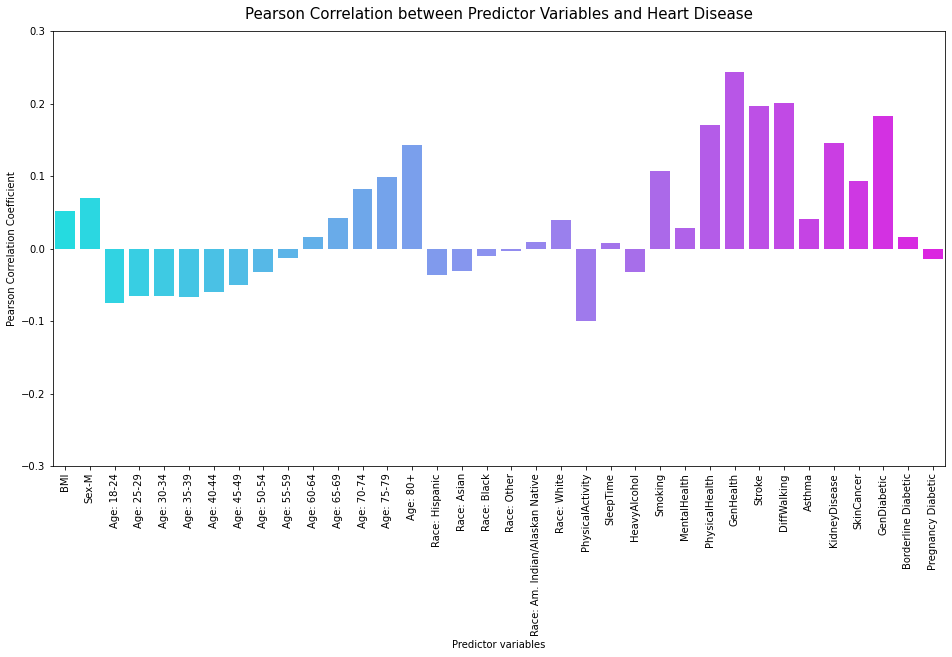

In [16]:
# Pearson Correlation between each feature and HeartDisease
x_values = ['BMI',
            'Sex-M',
            'Age: 18-24',
            'Age: 25-29',
            'Age: 30-34',
            'Age: 35-39',
            'Age: 40-44',
            'Age: 45-49',
            'Age: 50-54',
            'Age: 55-59',
            'Age: 60-64',
            'Age: 65-69',
            'Age: 70-74',
            'Age: 75-79',
            'Age: 80+',
            'Race: Hispanic',
            'Race: Asian',
            'Race: Black',
            'Race: Other',
            'Race: Am. Indian/Alaskan Native',
            'Race: White',
            'PhysicalActivity',
            'SleepTime',
            'HeavyAlcohol',
            'Smoking',
            'MentalHealth',
            'PhysicalHealth',
            'GenHealth',
            'Stroke',
            'DiffWalking',
            'Asthma',
            'KidneyDisease',
            'SkinCancer',
            'GenDiabetic',
            'Borderline Diabetic',
            'Pregnancy Diabetic'
            ]

y_values = [corr_mat['HeartDisease']['BMI'],
            corr_mat['HeartDisease']['Sex'],
            corr_mat['HeartDisease']['Age: 18-24'],
            corr_mat['HeartDisease']['Age: 25-29'],
            corr_mat['HeartDisease']['Age: 30-34'],
            corr_mat['HeartDisease']['Age: 35-39'],
            corr_mat['HeartDisease']['Age: 40-44'],
            corr_mat['HeartDisease']['Age: 45-49'],
            corr_mat['HeartDisease']['Age: 50-54'],
            corr_mat['HeartDisease']['Age: 55-59'],
            corr_mat['HeartDisease']['Age: 60-64'],
            corr_mat['HeartDisease']['Age: 65-69'],
            corr_mat['HeartDisease']['Age: 70-74'],
            corr_mat['HeartDisease']['Age: 75-79'],
            corr_mat['HeartDisease']['Age: 80+'],
            corr_mat['HeartDisease']['Race: Hispanic'],
            corr_mat['HeartDisease']['Race: Asian'],
            corr_mat['HeartDisease']['Race: Black'],
            corr_mat['HeartDisease']['Race: Other'],
            corr_mat['HeartDisease']['Race: Am. Indian/Alaskan Native'],
            corr_mat['HeartDisease']['Race: White'],
            corr_mat['HeartDisease']['PhysicalActivity'],
            corr_mat['HeartDisease']['SleepTime'],
            corr_mat['HeartDisease']['HeavyAlcohol'],
            corr_mat['HeartDisease']['Smoking'],
            corr_mat['HeartDisease']['MentalHealth'],
            corr_mat['HeartDisease']['PhysicalHealth'],
            corr_mat['HeartDisease']['GenHealth'],
            corr_mat['HeartDisease']['Stroke'],
            corr_mat['HeartDisease']['DiffWalking'],
            corr_mat['HeartDisease']['Asthma'],
            corr_mat['HeartDisease']['KidneyDisease'],
            corr_mat['HeartDisease']['SkinCancer'],
            corr_mat['HeartDisease']['GenDiabetic'],
            corr_mat['HeartDisease']['Borderline Diabetic'],
            corr_mat['HeartDisease']['Pregnancy Diabetic']
            ]

corr_ft_hd = plt.figure(figsize= (16, 8))
corr_ft_hd = sns.barplot( x = x_values, y = y_values, palette = "cool")
corr_ft_hd.set_title("Pearson Correlation between Predictor Variables and Heart Disease",
                     fontsize= 15, pad= 12)
corr_ft_hd.set(xlabel= "Predictor variables",
               ylabel= "Pearson Correlation Coefficient",
               ylim= (-0.3, 0.3))
corr_ft_hd.set_xticklabels(x_values, rotation= "vertical")

plt.show()

Interpretations:
1) AGE - The correlation between age and heart disease starts off negative but reverts to positive as age increases.

2) RACE - White population has the highest positive correlation with heart disease while the Hispanic population has the highest negative correlation, of equal magnitude. 

3) SEX - In comparison to female, the male population has a positive correlation with occurrence of heart disease.  

4) BMI - Was the correlation between BMI and Heart Disease higher or lower than you expected?

**Question 2: Does the distribution of SleepTime for people with HeartDisease and those who don’t have HeartDisease vary?**

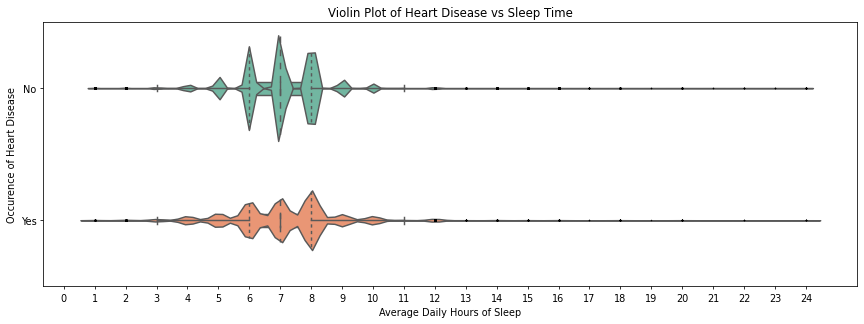

In [17]:
pcolors = sns.color_palette("Set2")

plt.figure(figsize=(15, 5), dpi=70)

flierprops = dict(marker='.', markerfacecolor='None', markersize=1,  markeredgecolor='black')

sns.boxplot(data=master_data, 
            x='SleepTime', 
            y='HeartDisease', 
            orient = 'h', 
            width=0.1, 
            flierprops=flierprops,
            palette = pcolors,
            boxprops={'zorder': 1}
            )
sns.violinplot(data=master_data, 
               x='SleepTime', 
               y='HeartDisease',   
               inner='quartile', 
               orient='h',
               width=0.8,
               palette = pcolors
               ).set(title='Violin Plot of Heart Disease vs Sleep Time',
                  xlabel='Average Daily Hours of Sleep',
                  ylabel='Occurence of Heart Disease',
                  xticks = range(25))

plt.show()

**Question 3: What is the extent to which Age explains the occurrence of HeartDisease for men versus women?**

In [18]:
data

,HeartDisease,BMI,Smoking,HeavyAlcohol,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Age: 80+,Race: Am. Indian/Alaskan Native,Race: Asian,Race: Black,Race: Hispanic,Race: Other,Race: White,GenDiabetic,Borderline Diabetic,Pregnancy Diabetic
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
# Get data of All Males
data_hd_by_age_male = data[data['Sex']==1]

In [20]:
# Drop all columns except the ones we want to analyze, i.e. HeartDisease and Age
data_hd_by_age_male = data_hd_by_age_male[['HeartDisease', 'Age: 18-24', 'Age: 25-29', 'Age: 30-34', 'Age: 35-39',
                                          'Age: 40-44', 'Age: 45-49', 'Age: 50-54', 'Age: 55-59', 'Age: 60-64',
                                          'Age: 65-69', 'Age: 70-74', 'Age: 75-79', 'Age: 80+']]

In [21]:
data_hd_by_age_male.reset_index(drop = True, inplace = True)

In [22]:
# Get data of All Females
data_hd_by_age_female = data[data['Sex']==0]

In [23]:
# Drop all columns except the ones we want to analyze, i.e. HeartDisease and Age
data_hd_by_age_female = data_hd_by_age_female[['HeartDisease', 'Age: 18-24', 'Age: 25-29', 'Age: 30-34', 'Age: 35-39',
                                          'Age: 40-44', 'Age: 45-49', 'Age: 50-54', 'Age: 55-59', 'Age: 60-64',
                                          'Age: 65-69', 'Age: 70-74', 'Age: 75-79', 'Age: 80+']]

In [24]:
data_hd_by_age_female.reset_index(drop = True, inplace = True)

In [25]:
# Correlation matrix of age and heartdisease for males
corr_mat_hd_age_male = data_hd_by_age_male.corr()
round (corr_mat_hd_age_male, 2)

,HeartDisease,Age: 18-24,Age: 25-29,Age: 30-34,Age: 35-39,Age: 40-44,Age: 45-49,Age: 50-54,Age: 55-59,Age: 60-64,Age: 65-69,Age: 70-74,Age: 75-79,Age: 80+
HeartDisease,1.00,-0.09,-0.08,-0.08,-0.08,-0.07,-0.06,-0.04,-0.02,0.02,0.06,0.11,0.13,0.16
Age: 18-24,-0.09,1.00,-0.07,-0.07,-0.08,-0.08,-0.08,-0.08,-0.09,-0.10,-0.10,-0.09,-0.07,-0.07
Age: 25-29,-0.08,-0.07,1.00,-0.07,-0.07,-0.07,-0.07,-0.07,-0.08,-0.09,-0.09,-0.08,-0.06,-0.06
Age: 30-34,-0.08,-0.07,-0.07,1.00,-0.07,-0.07,-0.07,-0.08,-0.08,-0.09,-0.09,-0.08,-0.07,-0.07
Age: 35-39,-0.08,-0.08,-0.07,-0.07,1.00,-0.07,-0.07,-0.08,-0.09,-0.09,-0.09,-0.08,-0.07,-0.07
Age: 40-44,-0.07,-0.08,-0.07,-0.07,-0.07,1.00,-0.07,-0.08,-0.09,-0.09,-0.09,-0.08,-0.07,-0.07
Age: 45-49,-0.06,-0.08,-0.07,-0.07,-0.07,-0.07,1.00,-0.08,-0.09,-0.09,-0.09,-0.09,-0.07,-0.07
Age: 50-54,-0.04,-0.08,-0.07,-0.08,-0.08,-0.08,-0.08,1.00,-0.09,-0.10,-0.10,-0.09,-0.07,-0.08
Age: 55-59,-0.02,-0.09,-0.08,-0.08,-0.09,-0.09,-0.09,-0.09,1.00,-0.11,-0.11,-0.10,-0.08,-0.08
Age: 60-64,0.02,-0.10,-0.09,-0.09,-0.09,-0.09,-0.09,-0.10,-0.11,1.00,-0.12,-0.11,-0.09,-0.09


In [26]:
# Correlation matrix of age and heartdisease for females
corr_mat_hd_age_female = data_hd_by_age_female.corr()
round (corr_mat_hd_age_female, 2)

,HeartDisease,Age: 18-24,Age: 25-29,Age: 30-34,Age: 35-39,Age: 40-44,Age: 45-49,Age: 50-54,Age: 55-59,Age: 60-64,Age: 65-69,Age: 70-74,Age: 75-79,Age: 80+
HeartDisease,1.00,-0.06,-0.05,-0.05,-0.05,-0.05,-0.04,-0.03,-0.01,0.01,0.02,0.05,0.08,0.14
Age: 18-24,-0.06,1.00,-0.05,-0.06,-0.06,-0.06,-0.07,-0.07,-0.08,-0.08,-0.08,-0.08,-0.07,-0.08
Age: 25-29,-0.05,-0.05,1.00,-0.05,-0.06,-0.06,-0.06,-0.07,-0.07,-0.08,-0.08,-0.08,-0.06,-0.07
Age: 30-34,-0.05,-0.06,-0.05,1.00,-0.06,-0.06,-0.06,-0.07,-0.08,-0.08,-0.08,-0.08,-0.07,-0.07
Age: 35-39,-0.05,-0.06,-0.06,-0.06,1.00,-0.07,-0.07,-0.08,-0.08,-0.09,-0.09,-0.09,-0.07,-0.08
Age: 40-44,-0.05,-0.06,-0.06,-0.06,-0.07,1.00,-0.07,-0.08,-0.08,-0.09,-0.09,-0.09,-0.07,-0.08
Age: 45-49,-0.04,-0.07,-0.06,-0.06,-0.07,-0.07,1.00,-0.08,-0.09,-0.09,-0.09,-0.09,-0.08,-0.08
Age: 50-54,-0.03,-0.07,-0.07,-0.07,-0.08,-0.08,-0.08,1.00,-0.09,-0.10,-0.10,-0.10,-0.08,-0.09
Age: 55-59,-0.01,-0.08,-0.07,-0.08,-0.08,-0.08,-0.09,-0.09,1.00,-0.11,-0.11,-0.11,-0.09,-0.10
Age: 60-64,0.01,-0.08,-0.08,-0.08,-0.09,-0.09,-0.09,-0.10,-0.11,1.00,-0.12,-0.12,-0.10,-0.11


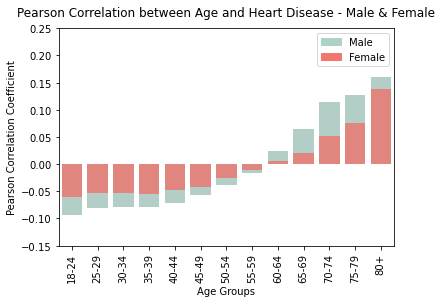

In [27]:
# Pearson Correlation between Age and HeartDisease
x_values_male = ['18-24',
                 '25-29',
                 '30-34',
                 '35-39',
                 '40-44',
                 '45-49',
                 '50-54',
                 '55-59',
                 '60-64',
                 '65-69',
                 '70-74',
                 '75-79',
                 '80+']
x_values_female = ['18-24',
                 '25-29',
                 '30-34',
                 '35-39',
                 '40-44',
                 '45-49',
                 '50-54',
                 '55-59',
                 '60-64',
                 '65-69',
                 '70-74',
                 '75-79',
                 '80+']

y_values_male = list(corr_mat_hd_age_male['HeartDisease'][1:])
y_values_female = list(corr_mat_hd_age_female['HeartDisease'][1:])


corr_age_hd = plt.figure(figsize= (6, 4))
corr_age_hd = sns.barplot( x = x_values_male, y = y_values_male, color = '#afd2c8')
corr_age_hd = sns.barplot( x = x_values_female, y = y_values_female, color = '#f0786e')
corr_age_hd.set_title("Pearson Correlation between Age and Heart Disease - Male & Female",
                     fontsize= 12, pad= 12)
corr_age_hd.set(xlabel= "Age Groups",
                     ylabel= "Pearson Correlation Coefficient",
                     ylim= (-0.15, 0.25))
corr_age_hd.set_xticklabels(x_values_male, rotation= "vertical")

# Adding Legends
blue_patch = mpatches.Patch(color='#afd2c8', label='Male')
pink_patch = mpatches.Patch(color='#f0786e', label='Female')
plt.legend(handles=[blue_patch, pink_patch])

plt.show()

Interpretations:
1) Across all age groups, there is a larger correlation in magnitude between men and heart disease than women

2) Women experience the highest 'jump' between ages 75-79 and 80+

3) Men experience the highest 'jump' between ages 65-69 and 70-79

4) The inflection point at which age becomes positively correlated with the occurrence of heart disease from negatively correlated is the same for both men and women, between ages 55-59 and 60-64.

**Question 4: What are the highest risk factors for HeartDisease amongst the 18 - 34 age group?**

In [28]:
ya = data[(data['Age: 18-24'] == 1) | (data['Age: 25-29'] == 1) | (data['Age: 30-34'] == 1)]
ya.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'HeavyAlcohol', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Age: 18-24', 'Age: 25-29', 'Age: 30-34', 'Age: 35-39',
       'Age: 40-44', 'Age: 45-49', 'Age: 50-54', 'Age: 55-59', 'Age: 60-64',
       'Age: 65-69', 'Age: 70-74', 'Age: 75-79', 'Age: 80+',
       'Race: Am. Indian/Alaskan Native', 'Race: Asian', 'Race: Black',
       'Race: Hispanic', 'Race: Other', 'Race: White', 'GenDiabetic',
       'Borderline Diabetic', 'Pregnancy Diabetic'],
      dtype='object')

In [29]:
ya.drop(['Age: 18-24', 'Age: 25-29', 'Age: 30-34', 'Age: 35-39', 'Age: 40-44','Age: 45-49', 'Age: 50-54', 'Age: 55-59', 'Age: 60-64','Age: 65-69', 'Age: 70-74', 'Age: 75-79', 'Age: 80+'], axis = 1, inplace = True)

/var/folders/dv/5l372gxs1fngpzpszlyckzym0000gn/T/ipykernel_17233/1812840851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ya.drop(['Age: 18-24', 'Age: 25-29', 'Age: 30-34', 'Age: 35-39', 'Age: 40-44','Age: 45-49', 'Age: 50-54', 'Age: 55-59', 'Age: 60-64','Age: 65-69', 'Age: 70-74', 'Age: 75-79', 'Age: 80+'], axis = 1, inplace = True)


In [30]:
ya.drop(['Stroke','PhysicalHealth', 'MentalHealth', 'DiffWalking', 'PhysicalActivity', 'GenHealth','SleepTime', 'Asthma', 'SkinCancer', 'KidneyDisease', 'GenDiabetic','Borderline Diabetic', 'Pregnancy Diabetic'], axis = 1, inplace = True)


/var/folders/dv/5l372gxs1fngpzpszlyckzym0000gn/T/ipykernel_17233/689313102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ya.drop(['Stroke','PhysicalHealth', 'MentalHealth', 'DiffWalking', 'PhysicalActivity', 'GenHealth','SleepTime', 'Asthma', 'SkinCancer', 'KidneyDisease', 'GenDiabetic','Borderline Diabetic', 'Pregnancy Diabetic'], axis = 1, inplace = True)


In [31]:
ya.rename (columns= {'Race: Am. Indian/Alaskan Native': 'AmInd_AKNat',
                     'Race: Asian': 'Asian',
                     'Race: Black': 'Black',
                     'Race: Hispanic': 'Hispanic',
                     'Race: Other': 'Other_Race',
                     'Race: White': 'White',
                     'Sex': 'Sex_M'            
}, inplace = True)

yacorr = ya.corr().loc['HeartDisease']
round (yacorr, 2)

/var/folders/dv/5l372gxs1fngpzpszlyckzym0000gn/T/ipykernel_17233/1939308186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ya.rename (columns= {'Race: Am. Indian/Alaskan Native': 'AmInd_AKNat',


HeartDisease    1.00
BMI             0.02
Smoking         0.04
HeavyAlcohol    0.00
Sex_M           0.01
AmInd_AKNat     0.01
Asian          -0.00
Black           0.00
Hispanic        0.00
Other_Race      0.01
White          -0.01
Name: HeartDisease, dtype: float64

In [32]:
yacorr

HeartDisease    1.000000
BMI             0.018048
Smoking         0.038228
HeavyAlcohol    0.004007
Sex_M           0.005130
AmInd_AKNat     0.012544
Asian          -0.004396
Black           0.004929
Hispanic        0.004982
Other_Race      0.010226
White          -0.012894
Name: HeartDisease, dtype: float64

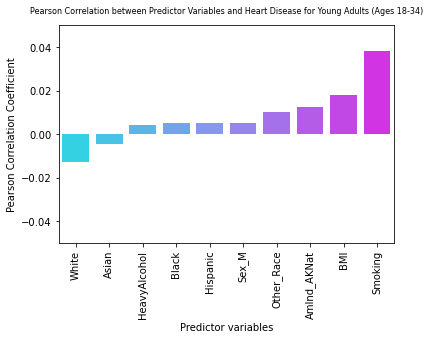

In [33]:
ya_sort = yacorr.sort_values()
ya_sort = ya_sort.drop('HeartDisease')

yaplot = plt.figure(figsize= (6, 4))
yaplot = sns.barplot( x = ya_sort.index, y = ya_sort.values, palette = "cool")
yaplot.set_title("Pearson Correlation between Predictor Variables and Heart Disease for Young Adults (Ages 18-34)",
                     fontsize= 8, pad= 12)
yaplot.set(xlabel= "Predictor variables",
                           ylabel= "Pearson Correlation Coefficient",
                           ylim= (-0.05, 0.05))
yaplot.set_xticklabels(ya_sort.index, rotation= "vertical")

plt.show()

**Question 5: What is the percentage of people with HeartDisease versus those without within each Race from the dataset?**

In [34]:
# First, let us see how many people are diagnosed with heart disease, grouped by race
master_data.groupby(['Race', 'HeartDisease']).HeartDisease.count()

Race                            HeartDisease
American Indian/Alaskan Native  No                4660
                                Yes                542
Asian                           No                7802
                                Yes                266
Black                           No               21210
                                Yes               1729
Hispanic                        No               26003
                                Yes               1443
Other                           No               10042
                                Yes                886
White                           No              222705
                                Yes              22507
Name: HeartDisease, dtype: int64

In [35]:
# For this analysis, we will ignore the 'Others' category of the race

In [36]:
# Custom function to print a simple pie chart
def pie_chart_percent_hd (race):
  master_data[master_data['Race'] == race]['HeartDisease'].value_counts().plot(kind= 'pie',
                                                                               autopct='%1.0f%%',
                                                                               startangle=90,
                                                                               colors = ['#afd2c8', '#f0a884'],
                                                                               title = race)

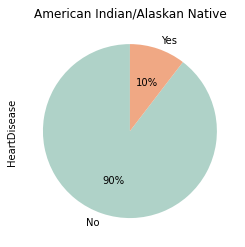

In [37]:
pie_chart_percent_hd ('American Indian/Alaskan Native')

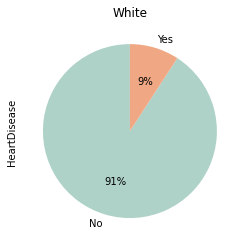

In [38]:
pie_chart_percent_hd ('White')

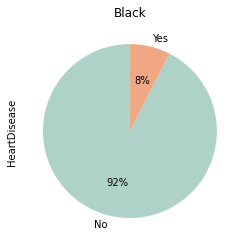

In [39]:
pie_chart_percent_hd ('Black')

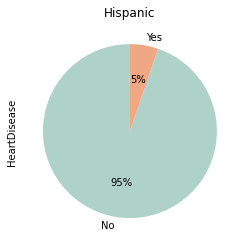

In [40]:
pie_chart_percent_hd ('Hispanic')

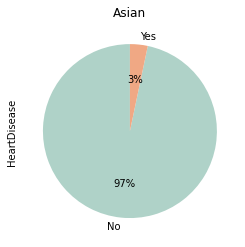

In [41]:
pie_chart_percent_hd ('Asian')

Interpretations:

In this dataset, the percentage of Heart Disease is highest amongst American Indians (>10%), followed by White (about 9%). The least percentage of heart disease is amonsgst Asians (about 3%).

**V. Data Modeling**

In [42]:
ya.reset_index(drop = True, inplace = True)
ya

,HeartDisease,BMI,Smoking,HeavyAlcohol,Sex_M,AmInd_AKNat,Asian,Black,Hispanic,Other_Race,White
0,0,26.25,0,0,1,0,0,0,0,0,1
1,0,41.60,1,0,0,0,0,1,0,0,0
2,0,21.40,1,0,0,0,0,0,0,0,1
3,0,38.92,0,0,1,0,0,0,0,0,1
4,0,25.85,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
56767,0,30.67,0,0,0,0,0,0,1,0,0
56768,0,33.28,0,0,0,0,0,0,1,0,0
56769,0,36.54,0,0,1,0,0,0,1,0,0
56770,0,22.22,0,0,0,0,0,0,1,0,0


In [43]:
import statsmodels.formula.api as smf
model = smf.logit (' HeartDisease ~ HeavyAlcohol + Sex_M + BMI + Smoking + White + Asian + Hispanic + Black + AmInd_AKNat', data = ya)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.048598
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                56772
Model:                          Logit   Df Residuals:                    56762
Method:                           MLE   Df Model:                            9
Date:                Sat, 14 Jan 2023   Pseudo R-squ.:                 0.01878
Time:                        01:21:55   Log-Likelihood:                -2759.0
converged:                       True   LL-Null:                       -2811.8
Covariance Type:            nonrobust   LLR p-value:                 1.141e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.3016      0.251    -21.086      0.000      -5.794      -4.809
HeavyAlcohol    -0.0447

In [44]:
#just the coefficients
print(results.params)

Intercept      -5.301631
HeavyAlcohol   -0.044670
Sex_M           0.071604
BMI             0.020485
Smoking         0.799793
White          -0.469292
Asian          -0.398092
Hispanic       -0.178713
Black          -0.112693
AmInd_AKNat     0.209702
dtype: float64
